In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Functions
def get_features(df):
    features = []
    for x in df.columns:  
        features.append(x)
    return features
def residual_plot(ax, x, y, y_hat, n_bins=50):
    residuals = y - y_hat
    ax.axhline(0, color='black', linestyle='--')
    ax.scatter(y_hat, residuals, color='grey', alpha=0.5)
    ax.set_ylabel(r'Residuals ($y - \hat y$)')
def lin_reg_score(df, features, target):
    for feature in features:
        X = df[[feature]]
        y = df[target]
        lin_mod = LinearRegression()
        lin_mod.fit(X, y)
        lin_mod.score(X, y)
        y_preds = lin_mod.predict(X)
        print(f'For X=df[[{feature}]], \n ---> r2 score: {r2_score(y , y_preds)}')


In [3]:
df = pd.read_csv('linear_reg.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


,interest_rate,amount_requested,amount_funded_by_investors,loan_length
count,2498.000000,2498.000000,2498.000000,2498.000000
mean,13.070368,12413.030424,12009.280661,41.265012
std,4.178007,7801.222483,7743.387861,9.933753
min,5.420000,1000.000000,-0.010000,36.000000
25%,10.160000,6000.000000,6000.000000,36.000000
50%,13.110000,10000.000000,10000.000000,36.000000
75%,15.800000,17000.000000,16000.000000,36.000000
max,24.890000,35000.000000,35000.000000,60.000000


In [4]:
df.head()

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.0,36.0
1,12.12,715-719,19200.0,19200.0,36.0
2,21.98,690-694,35000.0,35000.0,60.0
3,9.99,695-699,10000.0,9975.0,36.0
4,11.71,695-699,12000.0,12000.0,36.0


In [5]:
df[df['amount_funded_by_investors']<0]

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
400,12.29,685-689,7500.0,-0.01,36.0
1630,13.87,640-644,2200.0,-0.01,36.0


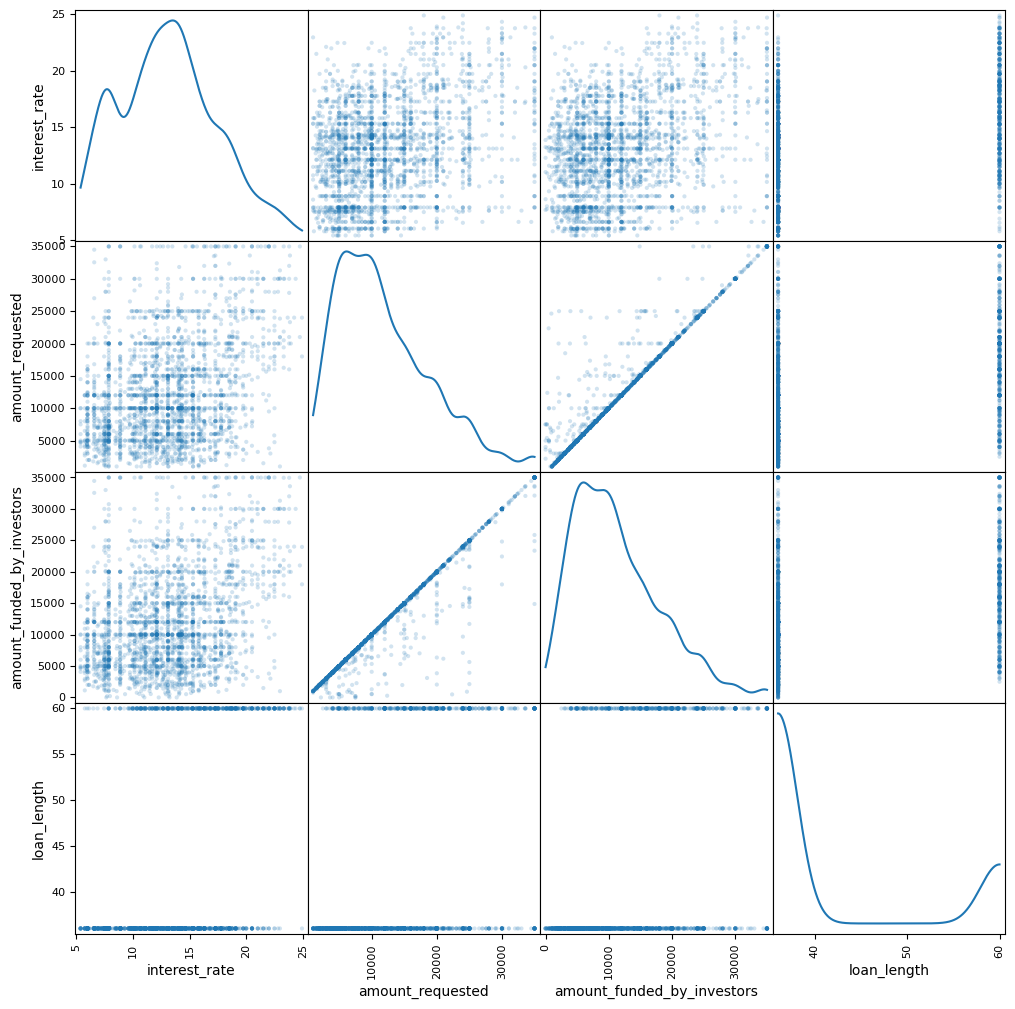

In [6]:
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal="kde");

In [7]:
# Changing Fico range to a average of the high and low
df["fico_score"] = (df["fico_range"].str.split("-").str[0].astype(int) + df["fico_range"].str.split("-").str[1].astype(int)) / 2
df = df.drop(columns=["fico_range"])

In [8]:
features = get_features(df)
target = 'interest_rate'

In [9]:
# Seperating columns into different DFs for testing
df_fico_avg = df.copy().drop(columns=['interest_rate'])
df_funded = df.copy().drop(columns=['interest_rate', 'amount_requested'])
df_requested = df.copy().drop(columns=['amount_requested', 'amount_funded_by_investors'])

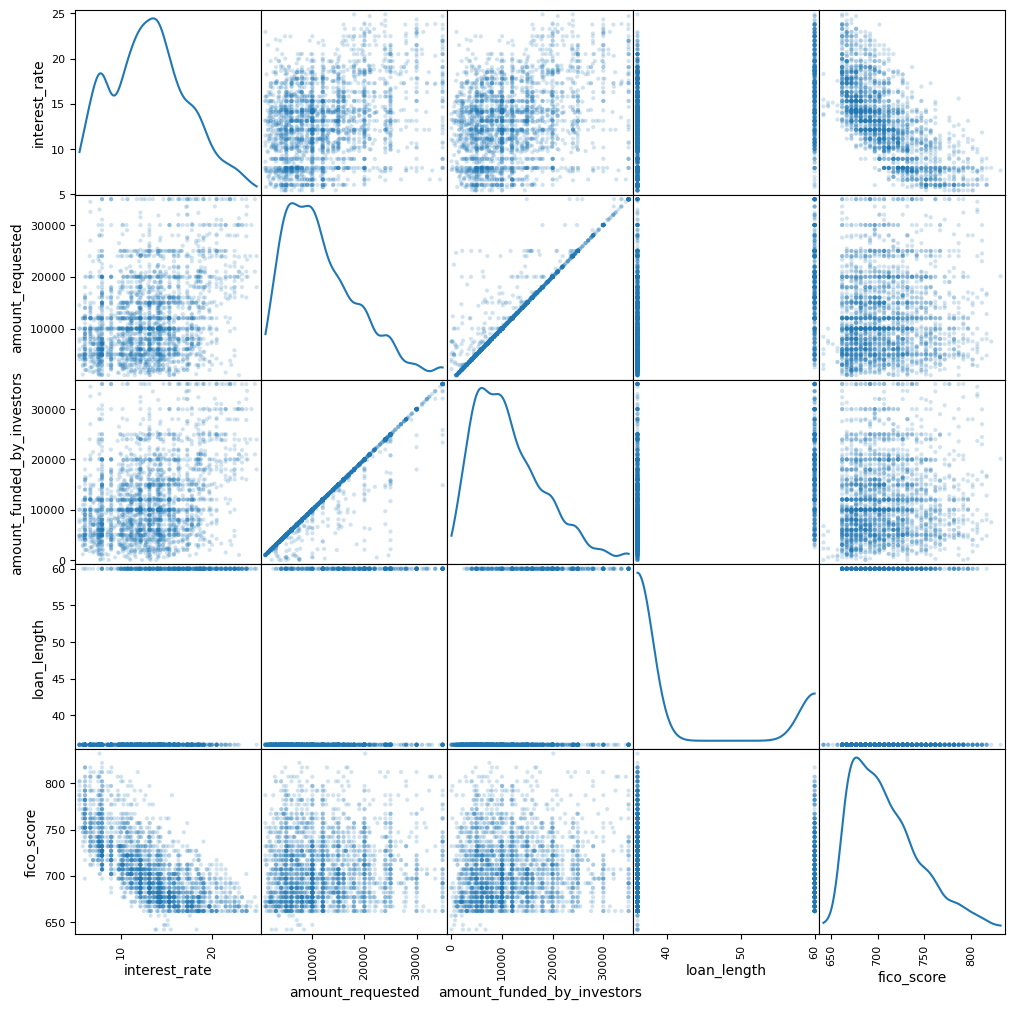

In [10]:
# Scatterplot of all relevant Columns
scatter_matrix(df[['interest_rate', 'amount_requested', 'amount_funded_by_investors', 'loan_length', 'fico_score']], alpha=0.2, figsize=(12, 12), diagonal="kde");

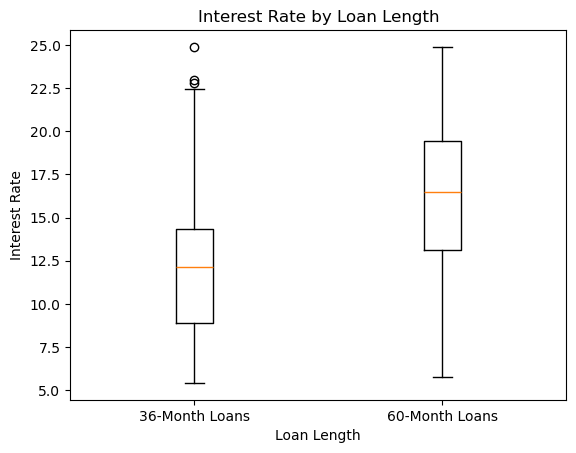

In [11]:
data = [
    df[df["loan_length"] == 36]["interest_rate"],
    df[df["loan_length"] == 60]["interest_rate"]]
labels = ["36-Month Loans", "60-Month Loans"]
plt.figure()
plt.boxplot(data, tick_labels=labels)
plt.title("Interest Rate by Loan Length")
plt.ylabel("Interest Rate")
plt.xlabel("Loan Length")
plt.show()

In [12]:
lin_reg_score(df, features, target)

For X=df[[interest_rate]], 
 ---> r2 score: 1.0
For X=df[[amount_requested]], 
 ---> r2 score: 0.1101119236174436
For X=df[[amount_funded_by_investors]], 
 ---> r2 score: 0.11345465116816889
For X=df[[loan_length]], 
 ---> r2 score: 0.17935713861265523
For X=df[[fico_score]], 
 ---> r2 score: 0.5029876752289809


In [26]:
lin_reg_score(df, features, target='amount_funded_by_investors')

For X=df[[interest_rate]], 
 ---> r2 score: 0.11345465116816889
For X=df[[amount_requested]], 
 ---> r2 score: 0.9405911153306049
For X=df[[amount_funded_by_investors]], 
 ---> r2 score: 1.0
For X=df[[loan_length]], 
 ---> r2 score: 0.16501342808142183
For X=df[[fico_score]], 
 ---> r2 score: 0.005518112449507506


In [13]:
df

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_score
0,8.90,20000.0,20000.00,36.0,737.0
1,12.12,19200.0,19200.00,36.0,717.0
2,21.98,35000.0,35000.00,60.0,692.0
3,9.99,10000.0,9975.00,36.0,697.0
4,11.71,12000.0,12000.00,36.0,697.0
...,...,...,...,...,...
2493,16.77,30000.0,29950.00,60.0,707.0
2494,14.09,16000.0,16000.00,60.0,742.0
2495,13.99,10000.0,10000.00,36.0,682.0
2496,12.42,6000.0,6000.00,36.0,677.0


In [14]:
# Summary of a model with only amount requested
X = df['amount_funded_by_investors']
y = df['interest_rate']

X_train_sm = sm.add_constant(X)

ols_model = sm.OLS(y, X_train_sm).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     319.4
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           2.54e-67
Time:                        15:40:36   Log-Likelihood:                -6965.3
No. Observations:                2498   AIC:                         1.393e+04
Df Residuals:                    2496   BIC:                         1.395e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [15]:
# Summary of a model with only loan length
X = df['loan_length']
y = df['interest_rate']

X_train_sm = sm.add_constant(X)

ols_model = sm.OLS(y, X_train_sm).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     545.5
Date:                Mon, 24 Nov 2025   Prob (F-statistic):          2.75e-109
Time:                        15:40:36   Log-Likelihood:                -6868.8
No. Observations:                2498   AIC:                         1.374e+04
Df Residuals:                    2496   BIC:                         1.375e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.7202      0.324     17.672      

In [16]:
df

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_score
0,8.90,20000.0,20000.00,36.0,737.0
1,12.12,19200.0,19200.00,36.0,717.0
2,21.98,35000.0,35000.00,60.0,692.0
3,9.99,10000.0,9975.00,36.0,697.0
4,11.71,12000.0,12000.00,36.0,697.0
...,...,...,...,...,...
2493,16.77,30000.0,29950.00,60.0,707.0
2494,14.09,16000.0,16000.00,60.0,742.0
2495,13.99,10000.0,10000.00,36.0,682.0
2496,12.42,6000.0,6000.00,36.0,677.0


In [17]:
# A summary of a model scaled with the target being Interest Rate
scaler = MinMaxScaler()

columns = ["amount_requested", "loan_length", "fico_score"]

df_funded = pd.DataFrame(scaler.fit_transform(df[columns]))
df_funded.columns = columns
X = df_funded
y = df['interest_rate']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train_sm = sm.add_constant(X_test)

ols_model = sm.OLS(y_test, X_train_sm).fit()

print(ols_model.summary())



                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     443.0
Date:                Mon, 24 Nov 2025   Prob (F-statistic):          7.32e-140
Time:                        15:40:36   Log-Likelihood:                -1094.4
No. Observations:                 500   AIC:                             2197.
Df Residuals:                     496   BIC:                             2214.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               16.4382      0.244  

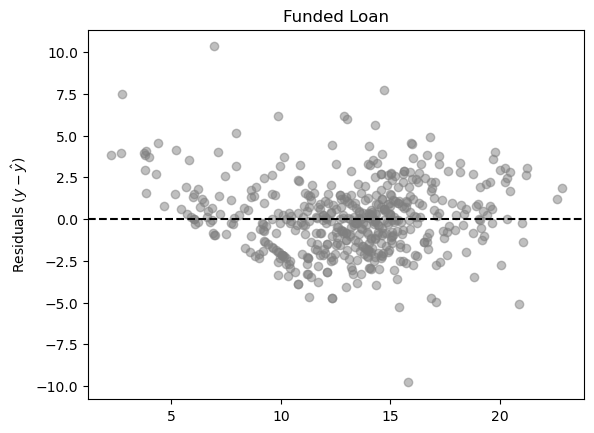

In [18]:
# A residual plot that uses the tranformed funded df with target being Interest Rate
X = df_funded
y = df['interest_rate']

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
fig, ax = plt.subplots()
residual_plot(ax, X_test, y_test, y_pred)
plt.title('Funded Loan');

In [19]:
# A summary of unscaled requested DF with the target being Amount Funded
X = df_requested
y = df['amount_funded_by_investors']

X_train_sm = sm.add_constant(X_test)

ols_model = sm.OLS(y_test, X_train_sm).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     443.0
Date:                Mon, 24 Nov 2025   Prob (F-statistic):          7.32e-140
Time:                        15:40:36   Log-Likelihood:                -1094.4
No. Observations:                 500   AIC:                             2197.
Df Residuals:                     496   BIC:                             2214.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               16.4382      0.244  

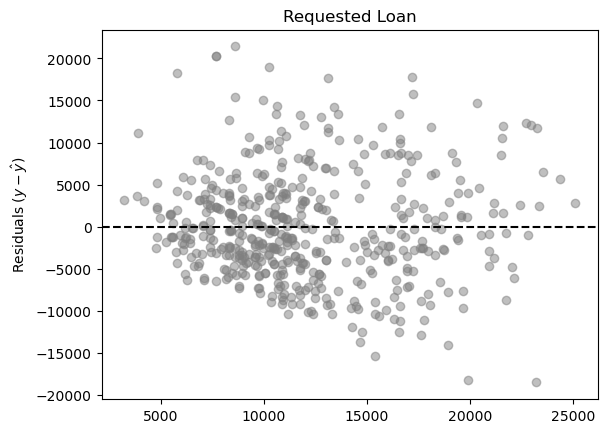

In [20]:
# A residual plot of load data with requested instead of funded and the target being Amount Funded
X = df_requested
y = df['amount_funded_by_investors']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
fig, ax = plt.subplots()
residual_plot(ax, X_test, y_test, y_pred)
plt.title('Requested Loan');

In [21]:
# A scaled sumary of requested DF with loan amount funded
scaler = MinMaxScaler()

columns = ["interest_rate", "loan_length", "fico_score"]

df_requested = pd.DataFrame(scaler.fit_transform(df[columns]))
df_requested.columns = columns

X_train_sm = sm.add_constant(df_requested)

ols_model = sm.OLS(y, X_train_sm).fit()

print(ols_model.summary())




                                OLS Regression Results                                
Dep. Variable:     amount_funded_by_investors   R-squared:                       0.318
Model:                                    OLS   Adj. R-squared:                  0.317
Method:                         Least Squares   F-statistic:                     387.3
Date:                        Mon, 24 Nov 2025   Prob (F-statistic):          1.63e-206
Time:                                15:40:36   Log-Likelihood:                -25435.
No. Observations:                        2498   AIC:                         5.088e+04
Df Residuals:                            2494   BIC:                         5.090e+04
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

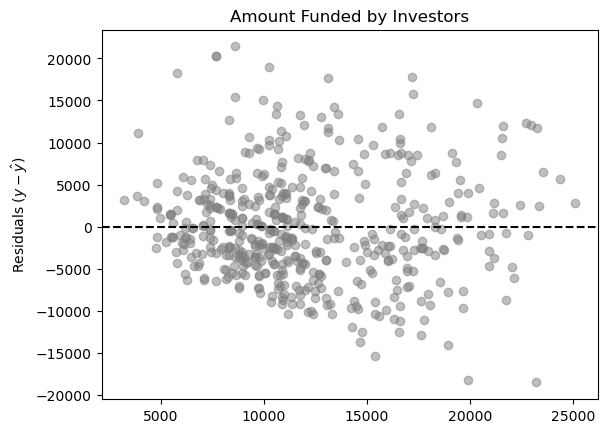

In [22]:
# A scaled residual plot with amount funded
X = df_requested
y = df['amount_funded_by_investors']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
fig, ax = plt.subplots()
residual_plot(ax, X_test, y_test, y_pred)
plt.title('Amount Funded by Investors');

In [32]:
scaled_df = pd.DataFrame(scaler.fit_transform(df))
scaled_df.columns = df.columns
scaled_df

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_score
0,0.178737,0.558824,0.571429,0.0,0.500000
1,0.344119,0.535294,0.548572,0.0,0.394737
2,0.850539,1.000000,1.000000,1.0,0.263158
3,0.234720,0.264706,0.285000,0.0,0.289474
4,0.323061,0.323529,0.342857,0.0,0.289474
...,...,...,...,...,...
2493,0.582948,0.852941,0.855714,1.0,0.342105
2494,0.445300,0.441176,0.457143,1.0,0.526316
2495,0.440164,0.264706,0.285714,0.0,0.210526
2496,0.359527,0.147059,0.171429,0.0,0.184211


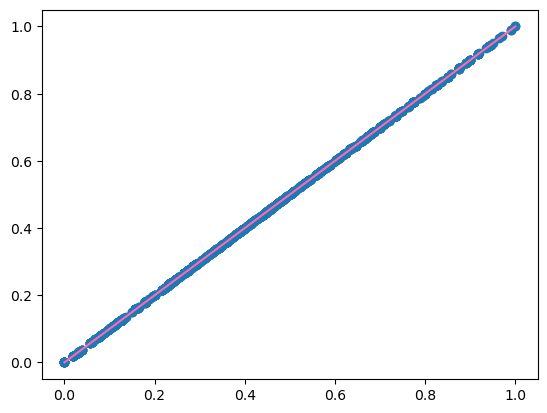

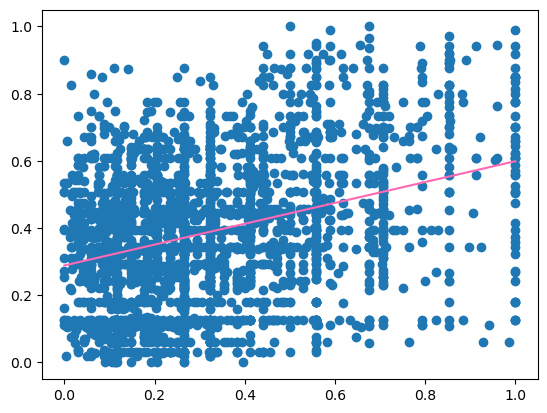

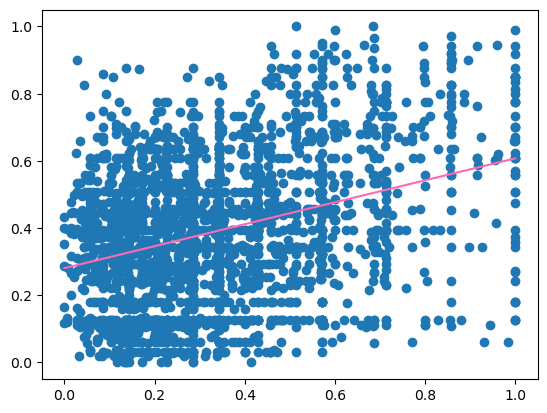

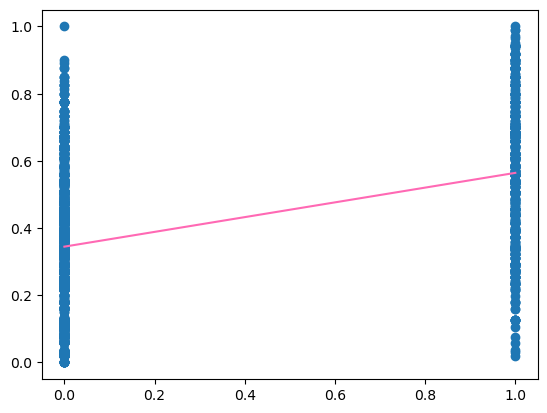

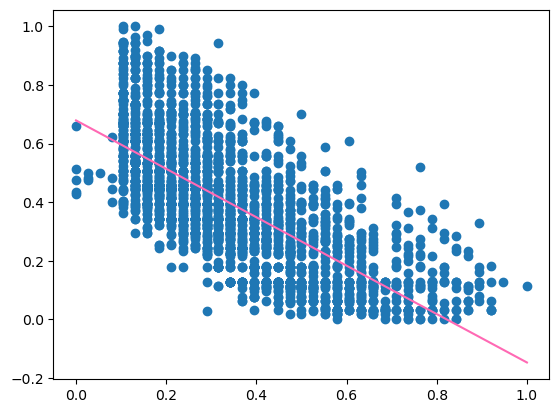

In [43]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df))
scaled_df.columns = df.columns
target = 'interest_rate'
for ele in df.columns:
    X = scaled_df[[ele]]
    y = scaled_df[target]
    displacement_lr = LinearRegression()
    displacement_lr.fit(X, y)
    X_sorted = X.sort_values(by=ele)
    y_predictions = displacement_lr.predict(X_sorted)
    plt.scatter(X, y, label='Displacement')
    plt.plot(X_sorted, y_predictions, label='Displacement', color='hotpink')
    plt.show()